## **Final Project 2: Logistic Regression and SVM**

This project was created to fulfill the assignment of The Introduction of Python for Data Science Course

### **Our Members** ###

- Caesariansyah Dwi Fadhilah
- Muhammad Reza Pahlevi

## **A. Introduction** 

 Understanding and accurately predicting weather conditions are pivotal for various aspects of our daily lives, impacting everything from outdoor plans to agricultural practices. In this context. Australia's climate varies greatly across its eight states and territories. Most of Australia has four seasons, while the dry and wet seasons take place in the tropical regions in the north of the continent. Because the country is so large, the climate in Australia differs greatly from region to region. In general, there are four seasons in most of the country, while the Top End (including Darwin, Katherine, Kakadu and Arnhem Land), Broome, Kimberley and Tropical North Queensland (Cairns, Whitsundays and Daintree Rainforest) experience a 'wet season' (November to April) and a 'dry season' (May to October). The wet season in northern Australia is characterized by very hot days, high humidity, monsoon rains and possibly cyclones, but also by its own charms.

 There fore,  we delve into a dataset spanning around 10 years, collecting daily weather observations from diverse locations across Australia. The primary objective is to predict next-day rain using classification models trained on the target variable, "RainTomorrow." This variable serves as the linchpin for prediction, addressing a straightforward yet impactful question: did it rain the next day, with responses categorized as "Yes" or "No"? Notably, the column is marked as "Yes" if the recorded rainfall on that day measures 1mm or more.

 To facilitate this investigation, a dataset sourced from Kaggle is utilized, containing information extracted from predicting next-day rain in Australia. This dataset consists of 145,460 rows and 23 columns.


## **B. Import Libraries**

The libraries are needed to build a linear regression model include numpy. sympy, seaborn, matplotlib, dython nominal, joblib, sklearn, and pickie.

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
from dython.nominal import associations
import missingno as msno

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import pickle
from pickle import dump,load

#set max columns to none
pd.set_option('display.max_columns', None)

## **C. Data Loading**

### **Import Dataset**

Import weatherAUS.csv as *df*. And the required of dataset will be read by the program.

In [2]:
df = pd.read_csv("weatherAUS.csv",parse_dates=['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Display the number of rows and columns.

In [4]:
df.shape

(145460, 23)

### **Type of Data**

Display summary information about the DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Summary of descriptive statistics from DataFrame

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,145460,2013-04-04 21:08:51.907053568,2007-11-01 00:00:00,2011-01-11 00:00:00,2013-06-02 00:00:00,2015-06-14 00:00:00,2017-06-25 00:00:00,NaN
MinTemp,143975.0,12.194034,-8.5,7.6,12.0,16.9,33.9,6.398495
MaxTemp,144199.0,23.221348,-4.8,17.9,22.6,28.2,48.1,7.119049
Rainfall,142199.0,2.360918,0.0,0.0,0.0,0.8,371.0,8.47806
Evaporation,82670.0,5.468232,0.0,2.6,4.8,7.4,145.0,4.193704
Sunshine,75625.0,7.611178,0.0,4.8,8.4,10.6,14.5,3.785483
WindGustSpeed,135197.0,40.03523,6.0,31.0,39.0,48.0,135.0,13.607062
WindSpeed9am,143693.0,14.043426,0.0,7.0,13.0,19.0,130.0,8.915375
WindSpeed3pm,142398.0,18.662657,0.0,13.0,19.0,24.0,87.0,8.8098
Humidity9am,142806.0,68.880831,0.0,57.0,70.0,83.0,100.0,19.029164


Descriptive statistics specific to object columns

In [7]:
df.describe(include='object').T

,count,unique,top,freq
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


Check Duplicated of Data

In [8]:
df.duplicated().sum()

0

## **D. Data Cleaning**

### **Drop Columns with High Missing Values**

In [10]:
df.isnull().mean().sort_values(ascending=False)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

As it can be seen from the missing values above, sunshine, evaporation, cloud3pm, and cloud9am features have lots of NaN values. Replacing those might increase the inaccuracy of the dataset. Thus, those features can be dropped instead. Furthermore, date feature can be dropped as well because this isn't a time series analysis.

In [11]:
df.drop(df[['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']], axis=1, inplace=True)

we also see missing values in our target variabel or "RainTomorrow" column, we will drop those rows

In [12]:
df = df.dropna(subset = ['RainTomorrow'])
df.shape

(142193, 19)

for the rest of the missing values, we will replace it later with median values

## **E. Exploration Data Analysis**

Percentage of tomorrow will be rain, based on rain today

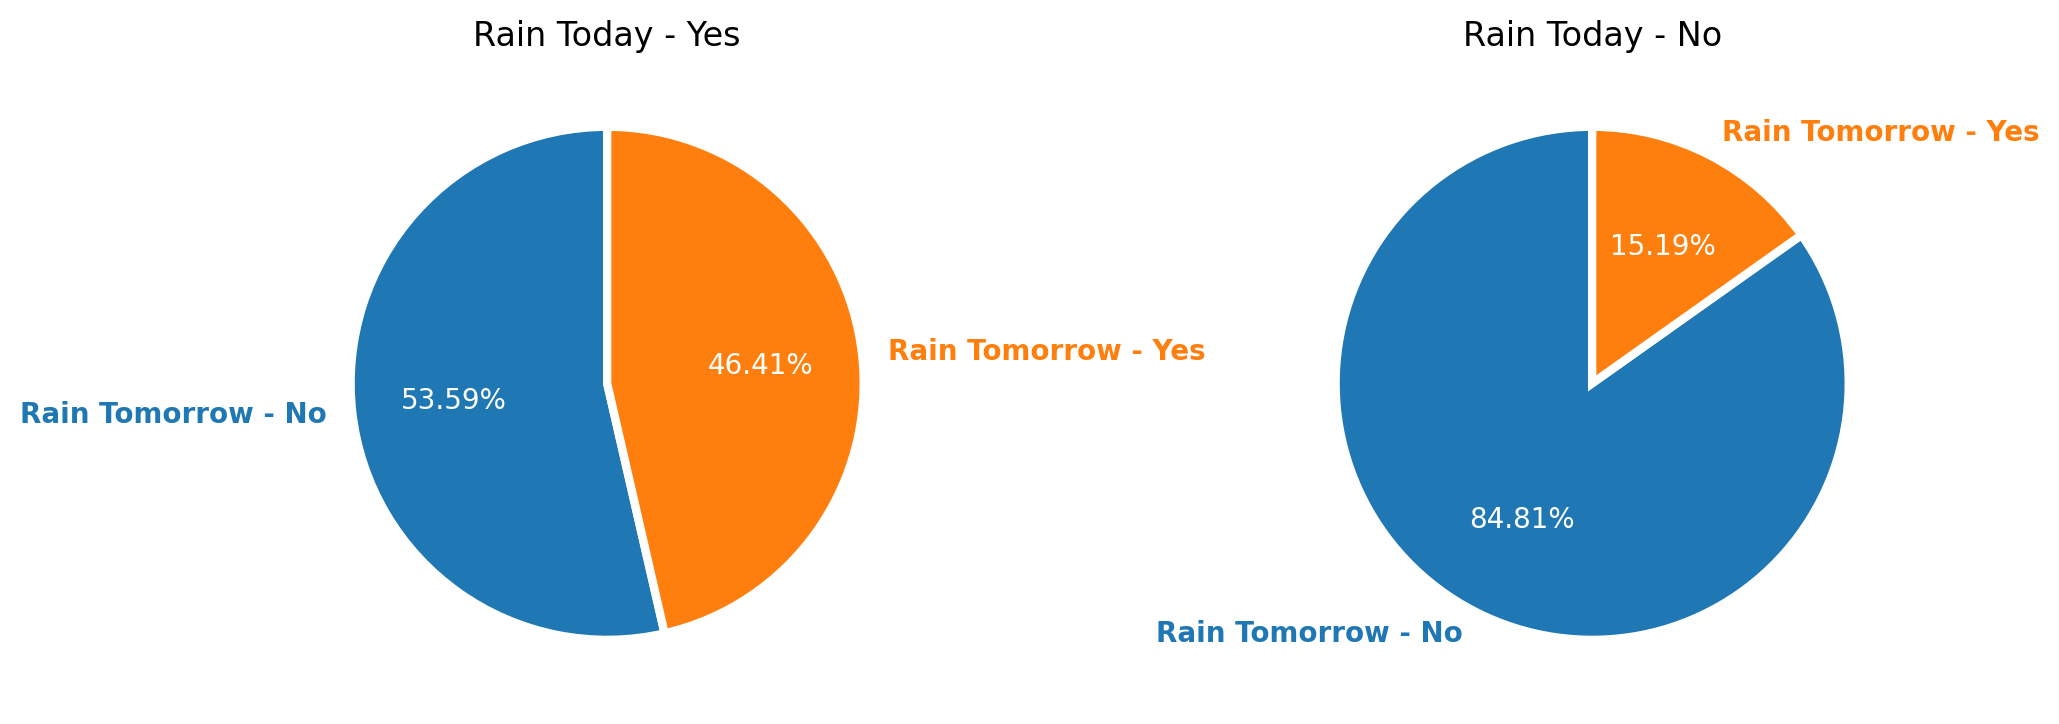

In [13]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

Calculates the percentage of rain tomorrow based on whether or not it rained today. It can be seen in the pie chart above that if it is raining today, the chance of rain tomorrow is higher than if it is not raining today. Vice versa, if it is not raining today, the chance of it not raining tomorrow is higher than if it is raining today.

### **Rainfall Distribution in Each Season**

In [14]:
# Create get_season function as follows:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create column season that includes apply function get_season to the column Date Month 
df_tmp = df.copy()
df_tmp['Season'] = df_tmp['Date'].dt.month.apply(get_season)